In [1]:

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from prophet import Prophet
import optuna
from sklearn.preprocessing import LabelEncoder


In [3]:

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv") 

In [4]:


df_train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [5]:


df_test.head()

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [6]:
df_train

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [7]:
df_test

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode
...,...,...,...,...,...
98545,328675,2019-12-31,Singapore,Premium Sticker Mart,Holographic Goose
98546,328676,2019-12-31,Singapore,Premium Sticker Mart,Kaggle
98547,328677,2019-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers
98548,328678,2019-12-31,Singapore,Premium Sticker Mart,Kerneler


In [8]:


df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [9]:



df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98550 entries, 0 to 98549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       98550 non-null  int64 
 1   date     98550 non-null  object
 2   country  98550 non-null  object
 3   store    98550 non-null  object
 4   product  98550 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:



df_train.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [11]:



df_test.describe()

,id
count,98550.000000
mean,279404.500000
std,28449.078852
min,230130.000000
25%,254767.250000
50%,279404.500000
75%,304041.750000
max,328679.000000


In [12]:


df_train.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [13]:


df_train['num_sold'].fillna(df_train['num_sold'].median(), inplace=True)

In [14]:
df_train.isnull().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [15]:


df_test.isnull().sum()

id         0
date       0
country    0
store      0
product    0
dtype: int64

In [16]:


df_train['date'] = pd.to_datetime(df_train['date'])
df_train['dayofyear'] = df_train['date'].dt.dayofyear
df_train['quarter'] = df_train['date'].dt.quarter
df_train['rolling_7'] = df_train['num_sold'].rolling(window=7).mean().fillna(method='bfill')
df_train['lag_7'] = df_train['num_sold'].shift(7).fillna(method='bfill')
df_test['date'] = pd.to_datetime(df_test['date'])
df_test['dayofyear'] = df_test['date'].dt.dayofyear
df_test['quarter'] = df_test['date'].dt.quarter


In [17]:
# Verify the conversion

print(df_train['date'].dtype)
print(df_test['date'].dtype)

datetime64[ns]
datetime64[ns]


In [18]:
# Create new features

for df in [df_train, df_test]:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day_of_week'] = df['date'].dt.dayofweek
    df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [19]:
# Display the first few rows with new features

df_train.head()

,id,date,country,store,product,num_sold,dayofyear,quarter,rolling_7,lag_7,year,month,day_of_week,is_weekend
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,605.0,1,1,790.714286,605.0,2010,1,4,0
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,1,1,790.714286,605.0,2010,1,4,0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,1,1,790.714286,605.0,2010,1,4,0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,1,1,790.714286,605.0,2010,1,4,0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,1,1,790.714286,605.0,2010,1,4,0


In [20]:


df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           230130 non-null  int64         
 1   date         230130 non-null  datetime64[ns]
 2   country      230130 non-null  object        
 3   store        230130 non-null  object        
 4   product      230130 non-null  object        
 5   num_sold     230130 non-null  float64       
 6   dayofyear    230130 non-null  int64         
 7   quarter      230130 non-null  int64         
 8   rolling_7    230130 non-null  float64       
 9   lag_7        230130 non-null  float64       
 10  year         230130 non-null  int64         
 11  month        230130 non-null  int64         
 12  day_of_week  230130 non-null  int64         
 13  is_weekend   230130 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(3)
memory usage: 24.6+ MB


In [21]:

sales_trend = df_train.groupby('date')['num_sold'].sum().reset_index()

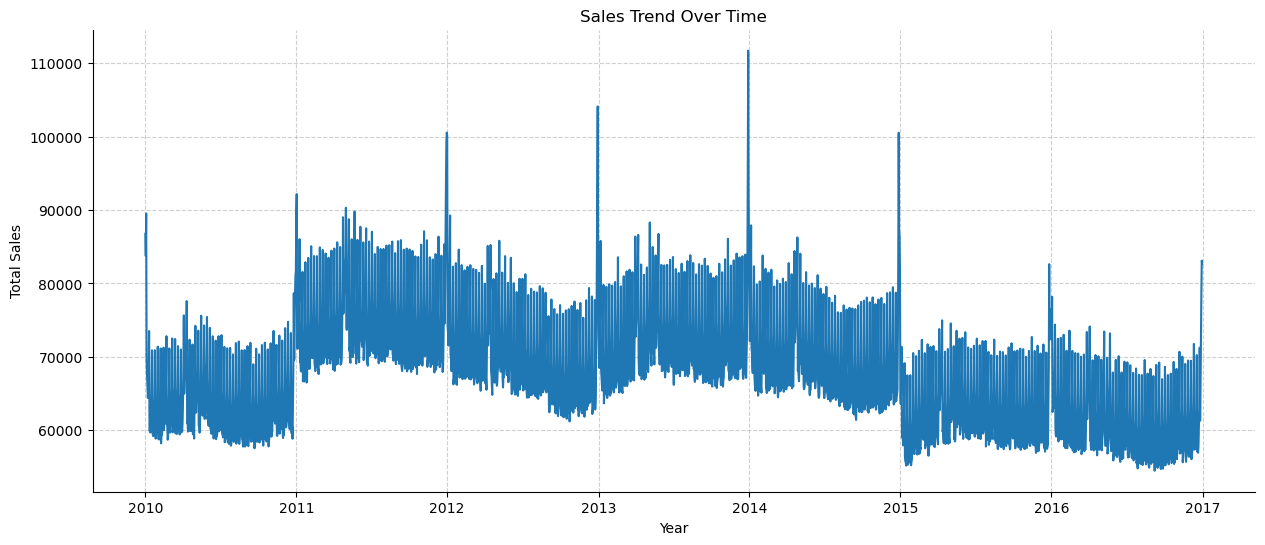

In [117]:
# Plot sales trend
plt.figure(figsize=(15, 6))
sns.lineplot(data=sales_trend, x='date', y='num_sold')
plt.title('Sales Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid lines with dashed style
sns.despine()
plt.show()

In [118]:
# Map month numbers to month names using a dictionary
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 
    5: 'May', 6: 'June', 7: 'July', 8: 'August', 
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

In [119]:
# Apply the mapping to create a 'month_name' column
df_train['month_name'] = df_train['month'].map(month_mapping)

In [120]:
# Aggregate sales by month
monthly_sales = df_train.groupby('month_name')['num_sold'].sum().reset_index()

In [121]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['month_name'] = pd.Categorical(monthly_sales['month_name'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('month_name')


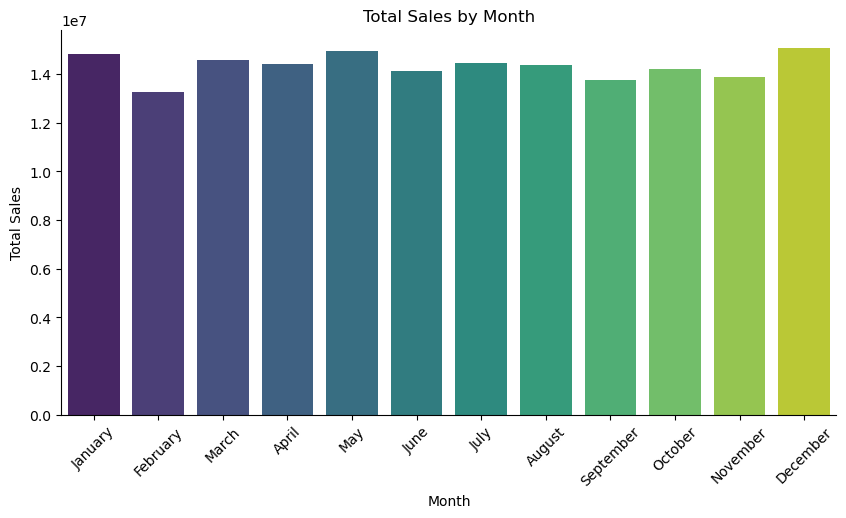

In [122]:
# Plot monthly sales
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_sales, x='month_name', y='num_sold', palette='viridis')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
sns.despine()
plt.xticks(rotation=45)
plt.show()

In [123]:
# Aggregate sales by day of the week
day_sales = df_train.groupby('day_of_week')['num_sold'].mean().reset_index()

# Map day numbers to labels
day_sales['day_of_week'] = day_sales['day_of_week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

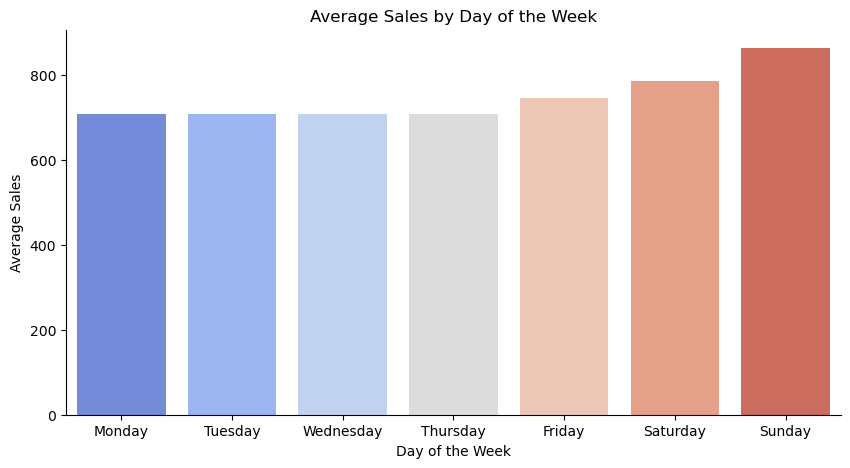

In [124]:
# Plot sales by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(data=day_sales, x='day_of_week', y='num_sold', palette='coolwarm')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
sns.despine()
plt.show()

In [125]:
# Aggregate sales by product
product_sales = df_train.groupby('product')['num_sold'].sum().reset_index()

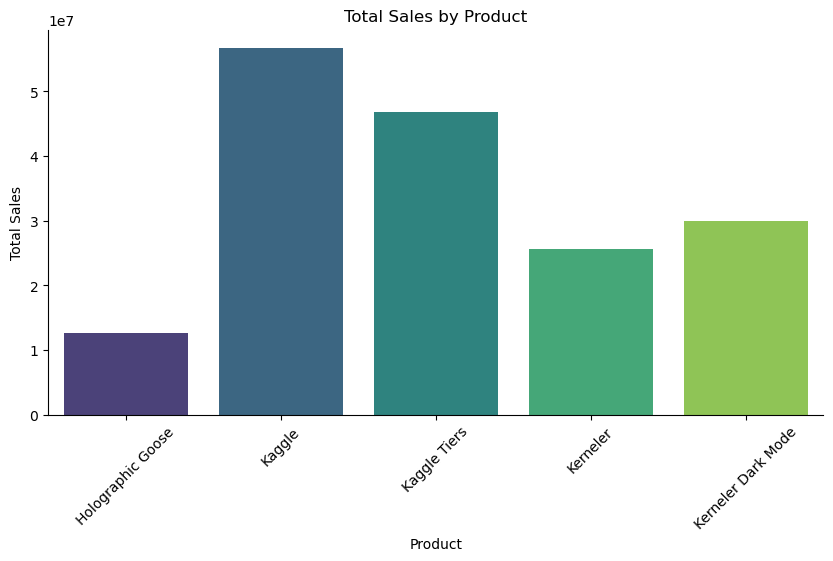

In [126]:
# Plot sales by product
plt.figure(figsize=(10, 5))
sns.barplot(data=product_sales, x='product', y='num_sold', palette='viridis')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
sns.despine()
plt.show()

In [127]:
# Aggregate sales by country
country_sales = df_train.groupby('country')['num_sold'].sum().reset_index()

In [128]:
# Sort the countries by total sales (optional)
country_sales = country_sales.sort_values('num_sold', ascending=False)

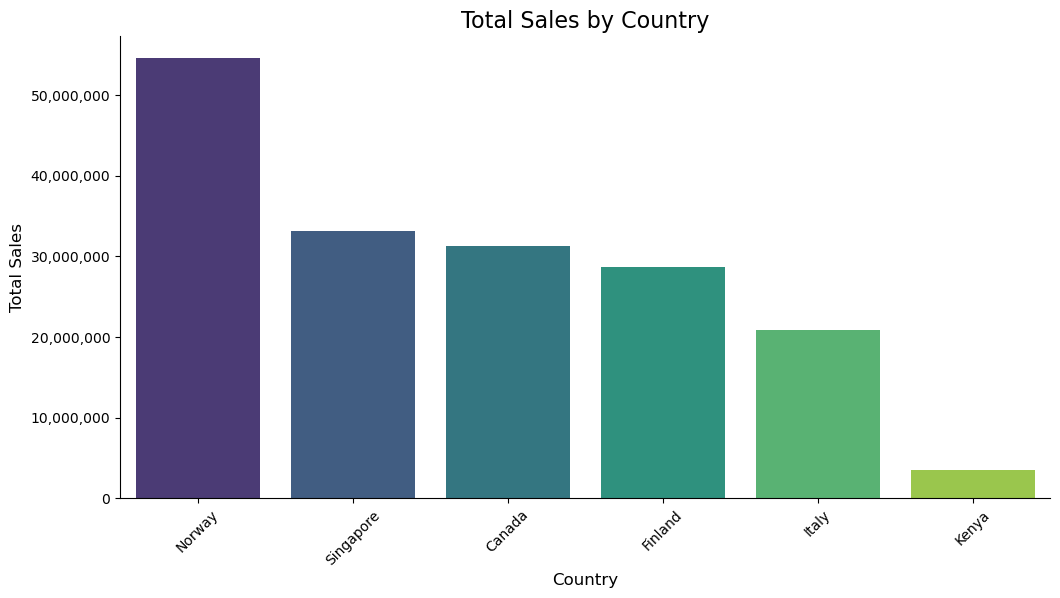

In [129]:
# Plot the total sales by country
plt.figure(figsize=(12, 6))
sns.barplot(data=country_sales, x='country', y='num_sold', palette='viridis')
plt.title('Total Sales by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Format y-axis to avoid scientific notation
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

sns.despine()
plt.xticks(rotation=45)  # Rotate country names for better readability
plt.show()

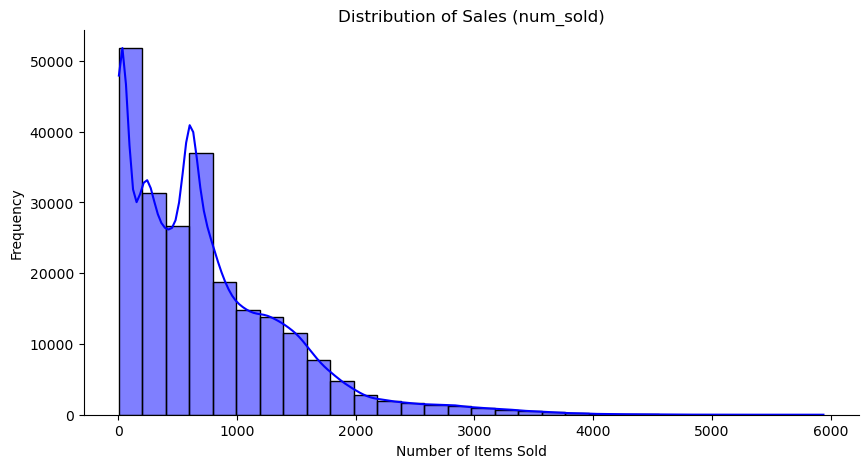

In [130]:
#Plot sales distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_train['num_sold'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sales (num_sold)')
plt.xlabel('Number of Items Sold')
plt.ylabel('Frequency')
sns.despine()
plt.show()

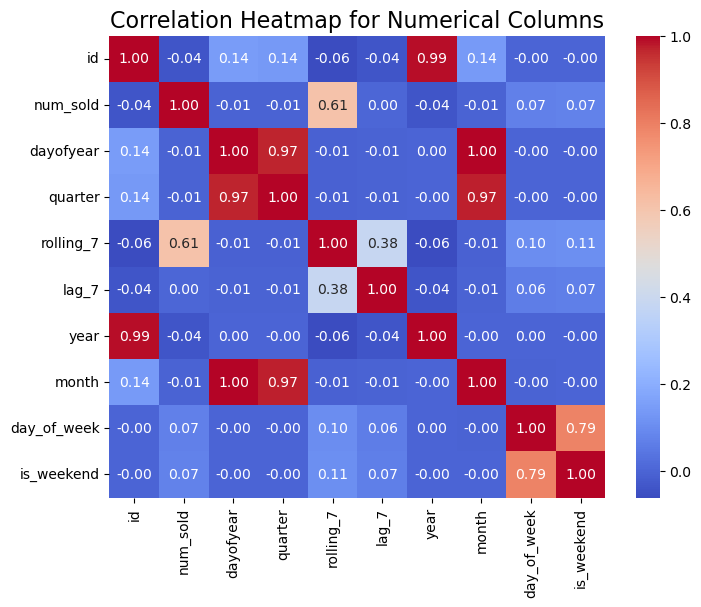

In [131]:
# Filter for numerical columns only
numerical_cols = df_train.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap for Numerical Columns', fontsize=16)
plt.show()

In [132]:
# Aggregate sales by store
store_sales = df_train.groupby('store')['num_sold'].sum().reset_index()

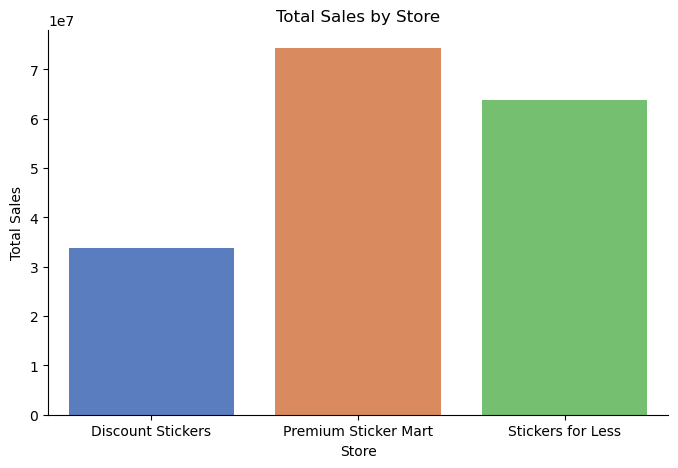

In [133]:
# Plot sales by store
plt.figure(figsize=(8, 5))
sns.barplot(data=store_sales, x='store', y='num_sold', palette='muted')
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
sns.despine()
plt.show()

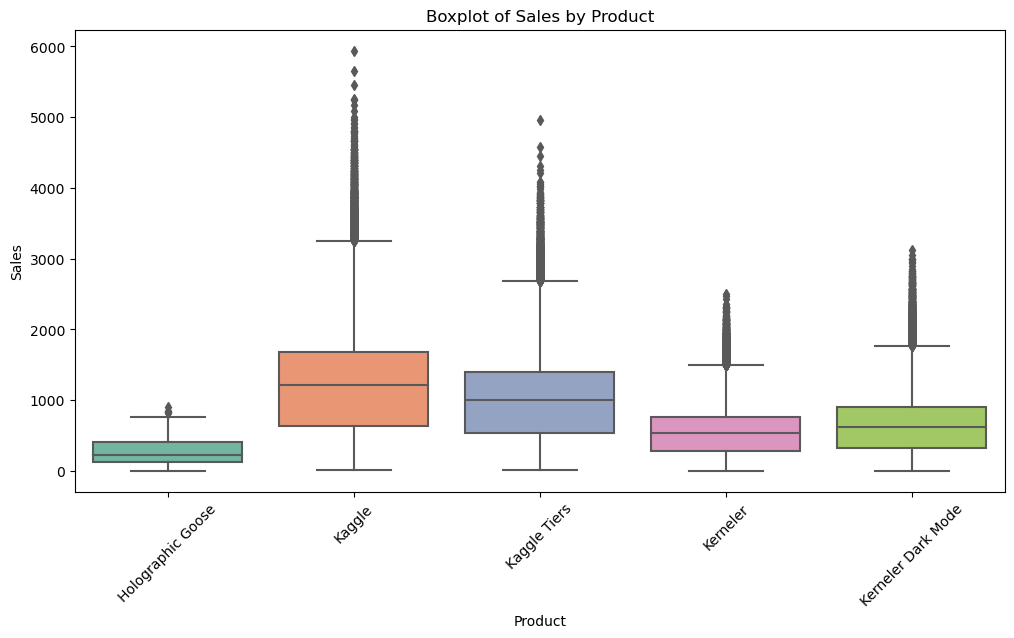

In [134]:
# Boxplot for sales by product
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='product', y='num_sold', palette='Set2')
plt.title('Boxplot of Sales by Product')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [135]:
# Aggregate sales by date and country
country_trend = df_train.groupby(['date', 'country'])['num_sold'].sum().reset_index()

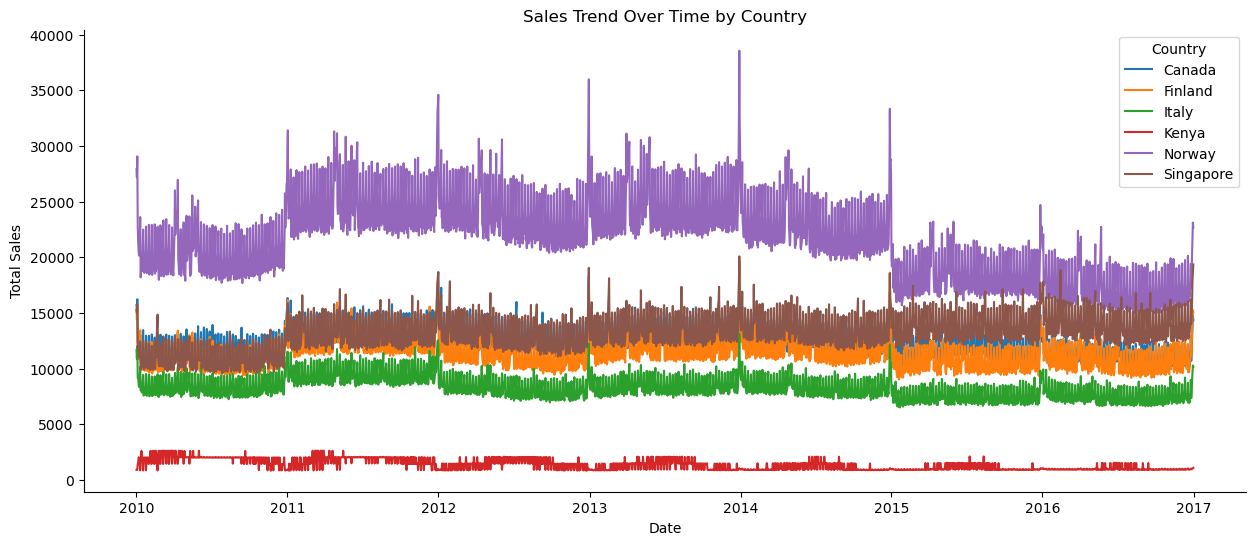

In [136]:
# Plot sales trends by country
plt.figure(figsize=(15, 6))
sns.lineplot(data=country_trend, x='date', y='num_sold', hue='country')
plt.title('Sales Trend Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Country')
sns.despine()
plt.show()

In [137]:
# Aggregate sales by product and country
product_country_sales = df_train.groupby(['product', 'country'])['num_sold'].sum().unstack()

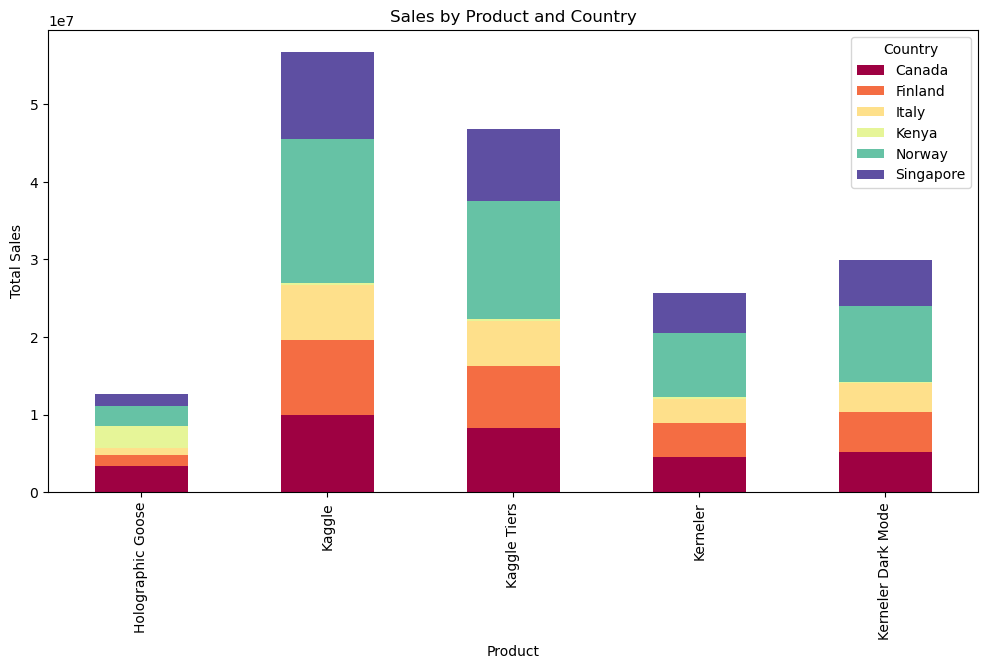

In [138]:
# Plot stacked bar chart
product_country_sales.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Spectral')
plt.title('Sales by Product and Country')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.legend(title='Country')
plt.show()

In [139]:
df_train.drop('month_name', axis= 1, inplace=True)

In [140]:
df_train.head()

,id,date,country,store,product,num_sold,dayofyear,quarter,rolling_7,lag_7,year,month,day_of_week,is_weekend
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,605.0,1,1,790.714286,605.0,2010,1,4,0
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,1,1,790.714286,605.0,2010,1,4,0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,1,1,790.714286,605.0,2010,1,4,0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,1,1,790.714286,605.0,2010,1,4,0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,1,1,790.714286,605.0,2010,1,4,0


In [141]:
df_train

,id,date,country,store,product,num_sold,dayofyear,quarter,rolling_7,lag_7,year,month,day_of_week,is_weekend
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,605.0,1,1,790.714286,605.0,2010,1,4,0
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,1,1,790.714286,605.0,2010,1,4,0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,1,1,790.714286,605.0,2010,1,4,0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,1,1,790.714286,605.0,2010,1,4,0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,1,1,790.714286,605.0,2010,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,366,4,1190.571429,556.0,2016,12,5,1
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,366,4,1514.857143,637.0,2016,12,5,1
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,366,4,1788.428571,384.0,2016,12,5,1
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,366,4,1625.857143,2380.0,2016,12,5,1


In [142]:
for col in ['country', 'store', 'product']:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])


In [143]:
df_train

,id,date,country,store,product,num_sold,dayofyear,quarter,rolling_7,lag_7,year,month,day_of_week,is_weekend
0,0,2010-01-01,0,0,0,605.0,1,1,790.714286,605.0,2010,1,4,0
1,1,2010-01-01,0,0,1,973.0,1,1,790.714286,605.0,2010,1,4,0
2,2,2010-01-01,0,0,2,906.0,1,1,790.714286,605.0,2010,1,4,0
3,3,2010-01-01,0,0,3,423.0,1,1,790.714286,605.0,2010,1,4,0
4,4,2010-01-01,0,0,4,491.0,1,1,790.714286,605.0,2010,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,5,1,0,466.0,366,4,1190.571429,556.0,2016,12,5,1
230126,230126,2016-12-31,5,1,1,2907.0,366,4,1514.857143,637.0,2016,12,5,1
230127,230127,2016-12-31,5,1,2,2299.0,366,4,1788.428571,384.0,2016,12,5,1
230128,230128,2016-12-31,5,1,3,1242.0,366,4,1625.857143,2380.0,2016,12,5,1


In [144]:
df_train['product'].value_counts()

0    46026
1    46026
2    46026
3    46026
4    46026
Name: product, dtype: int64

In [145]:
train_size = int(len(df_train) * 0.8)
train, eval = df_train[:train_size], df_train[train_size:]

In [146]:
features = ['month', 'day_of_week', 'is_weekend', 'country', 'store', 'product', 'dayofyear', 'quarter', 'rolling_7', 'lag_7']
X_train, y_train = train[features], train['num_sold']
X_test, y_eval = eval[features], eval['num_sold']

In [147]:
model_lgb = lgb.LGBMRegressor()
model_lgb.fit(X_train, y_train)
y_pred_lgb = model_lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


In [148]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

In [149]:
def evaluate(y_true, y_pred, model_name):
    print(f"{model_name} - RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}, R2: {r2_score(y_true, y_pred)}")

evaluate(y_eval, y_pred_lgb, "LightGBM")
evaluate(y_eval, y_pred_xgb, "XGBoost")

LightGBM - RMSE: 76.13288557949149, R2: 0.9830988573841422
XGBoost - RMSE: 68.14724733147285, R2: 0.9864584579940074


In [150]:
df_prophet = df_train[['date', 'num_sold']].rename(columns={'date': 'ds', 'num_sold': 'y'})
prophet = Prophet()
prophet.fit(df_prophet)
future = prophet.make_future_dataframe(periods=len(eval))
forecast = prophet.predict(future)

evaluate(eval['num_sold'], forecast['yhat'][-len(eval):].values, "Prophet")


17:17:53 - cmdstanpy - INFO - Chain [1] start processing
17:18:04 - cmdstanpy - INFO - Chain [1] done processing


Prophet - RMSE: 1377.818066137554, R2: -4.535479350844944


In [151]:
def objective(trial):
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 12)
    }
    model = lgb.LGBMRegressor(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return np.sqrt(mean_squared_error(y_eval, y_pred))

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
best_params = study.best_params
print("Best Hyperparameters for LightGBM:", best_params)

[I 2025-01-31 17:18:13,209] A new study created in memory with name: no-name-3792fcd4-ff4a-42ff-ad95-a8bef0241c3d


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-31 17:18:13,443] Trial 0 finished with value: 93.81591913838477 and parameters: {'learning_rate': 0.15699977486177408, 'num_leaves': 170, 'max_depth': 4}. Best is trial 0 with value: 93.81591913838477.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:14,117] Trial 1 finished with value: 65.50735023133804 and parameters: {'learning_rate': 0.06211876797825346, 'num_leaves': 168, 'max_depth': 10}. Best is trial 1 with value: 65.50735023133804.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:14,827] Trial 2 finished with value: 101.66278017029484 and parameters: {'learning_rate': 0.020480536225192598, 'num_leaves': 163, 'max_depth': 10}. Best is trial 1 with value: 65.50735023133804.
[I 2025-01-31 17:18:15,039] Trial 3 finished with value: 367.00780339381095 and parameters: {'learning_rate': 0.010443468217919112, 'num_leaves': 90, 'max_depth': 3}. Best is trial 1 with value: 65.50735023133804.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-31 17:18:15,404] Trial 4 finished with value: 128.4622746174553 and parameters: {'learning_rate': 0.024895969390358406, 'num_leaves': 55, 'max_depth': 5}. Best is trial 1 with value: 65.50735023133804.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-31 17:18:15,629] Trial 5 finished with value: 113.12224470848135 and parameters: {'learning_rate': 0.0700971166938679, 'num_leaves': 141, 'max_depth': 4}. Best is trial 1 with value: 65.50735023133804.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-31 17:18:16,256] Trial 6 finished with value: 83.55215660049546 and parameters: {'learning_rate': 0.0327830242670007, 'num_leaves': 151, 'max_depth': 7}. Best is trial 1 with value: 65.50735023133804.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-31 17:18:17,254] Trial 7 finished with value: 66.31059353576151 and parameters: {'learning_rate': 0.046300300137448375, 'num_leaves': 187, 'max_depth': 11}. Best is trial 1 with value: 65.50735023133804.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:18,190] Trial 8 finished with value: 66.8047494310736 and parameters: {'learning_rate': 0.041694816141019525, 'num_leaves': 194, 'max_depth': 12}. Best is trial 1 with value: 65.50735023133804.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:18,710] Trial 9 finished with value: 67.42996029100124 and parameters: {'learning_rate': 0.08773061436842114, 'num_leaves': 86, 'max_depth': 7}. Best is trial 1 with value: 65.50735023133804.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-31 17:18:19,778] Trial 10 finished with value: 65.23981988454875 and parameters: {'learning_rate': 0.23332928206303183, 'num_leaves': 126, 'max_depth': 9}. Best is trial 10 with value: 65.23981988454875.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-01-31 17:18:20,452] Trial 11 finished with value: 65.45429016650563 and parameters: {'learning_rate': 0.22222357972357484, 'num_leaves': 121, 'max_depth': 9}. Best is trial 10 with value: 65.23981988454875.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-01-31 17:18:21,243] Trial 12 finished with value: 66.4622113609698 and parameters: {'learning_rate': 0.2948650642091238, 'num_leaves': 121, 'max_depth': 9}. Best is trial 10 with value: 65.23981988454875.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-31 17:18:22,130] Trial 13 finished with value: 66.16005368518566 and parameters: {'learning_rate': 0.29133551044247463, 'num_leaves': 116, 'max_depth': 8}. Best is trial 10 with value: 65.23981988454875.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:22,413] Trial 14 finished with value: 76.90529021716101 and parameters: {'learning_rate': 0.14524094216408676, 'num_leaves': 25, 'max_depth': 8}. Best is trial 10 with value: 65.23981988454875.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-31 17:18:22,799] Trial 15 finished with value: 68.80305043924164 and parameters: {'learning_rate': 0.1658004431552317, 'num_leaves': 91, 'max_depth': 6}. Best is trial 10 with value: 65.23981988454875.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-31 17:18:23,405] Trial 16 finished with value: 64.61278197273998 and parameters: {'learning_rate': 0.10153088833151572, 'num_leaves': 125, 'max_depth': 9}. Best is trial 16 with value: 64.61278197273998.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:23,939] Trial 17 finished with value: 66.38515740100716 and parameters: {'learning_rate': 0.10425969431670444, 'num_leaves': 68, 'max_depth': 12}. Best is trial 16 with value: 64.61278197273998.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:24,652] Trial 18 finished with value: 64.90744436197092 and parameters: {'learning_rate': 0.1035200268249865, 'num_leaves': 135, 'max_depth': 10}. Best is trial 16 with value: 64.61278197273998.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:25,491] Trial 19 finished with value: 64.67455144645503 and parameters: {'learning_rate': 0.10423560216696295, 'num_leaves': 143, 'max_depth': 10}. Best is trial 16 with value: 64.61278197273998.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:26,443] Trial 20 finished with value: 64.72166381175975 and parameters: {'learning_rate': 0.07880700261098847, 'num_leaves': 106, 'max_depth': 11}. Best is trial 16 with value: 64.61278197273998.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:27,221] Trial 21 finished with value: 65.00330354258769 and parameters: {'learning_rate': 0.0822020411460693, 'num_leaves': 102, 'max_depth': 11}. Best is trial 16 with value: 64.61278197273998.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:27,971] Trial 22 finished with value: 65.24098201587378 and parameters: {'learning_rate': 0.1273902195031751, 'num_leaves': 147, 'max_depth': 11}. Best is trial 16 with value: 64.61278197273998.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:28,674] Trial 23 finished with value: 66.41766795247315 and parameters: {'learning_rate': 0.054043648829368275, 'num_leaves': 105, 'max_depth': 10}. Best is trial 16 with value: 64.61278197273998.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:29,182] Trial 24 finished with value: 67.08410552723787 and parameters: {'learning_rate': 0.10689840909334004, 'num_leaves': 65, 'max_depth': 12}. Best is trial 16 with value: 64.61278197273998.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:30,010] Trial 25 finished with value: 64.4031938202433 and parameters: {'learning_rate': 0.07807539599303866, 'num_leaves': 155, 'max_depth': 9}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-31 17:18:30,688] Trial 26 finished with value: 65.15582336699276 and parameters: {'learning_rate': 0.19360970898563323, 'num_leaves': 179, 'max_depth': 9}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, 

[I 2025-01-31 17:18:31,407] Trial 27 finished with value: 70.64367038961592 and parameters: {'learning_rate': 0.03733551267049451, 'num_leaves': 157, 'max_depth': 8}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-31 17:18:32,478] Trial 28 finished with value: 70.01834344929624 and parameters: {'learning_rate': 0.05853291470097841, 'num_leaves': 134, 'max_depth': 7}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-31 17:18:32,938] Trial 29 finished with value: 68.56338977491923 and parameters: {'learning_rate': 0.13132823289107787, 'num_leaves': 176, 'max_depth': 6}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-31 17:18:33,824] Trial 30 finished with value: 64.97728102290958 and parameters: {'learning_rate': 0.17968419497528718, 'num_leaves': 199, 'max_depth': 9}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:34,697] Trial 31 finished with value: 64.59557706956986 and parameters: {'learning_rate': 0.07891505015766495, 'num_leaves': 131, 'max_depth': 11}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:35,564] Trial 32 finished with value: 65.54081327587605 and parameters: {'learning_rate': 0.06575235178556783, 'num_leaves': 134, 'max_depth': 10}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:36,224] Trial 33 finished with value: 65.24438347117585 and parameters: {'learning_rate': 0.09045148217452202, 'num_leaves': 163, 'max_depth': 10}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:36,959] Trial 34 finished with value: 64.98205486316186 and parameters: {'learning_rate': 0.12579757084665447, 'num_leaves': 151, 'max_depth': 10}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:38,080] Trial 35 finished with value: 66.28661517126922 and parameters: {'learning_rate': 0.04796803947916175, 'num_leaves': 160, 'max_depth': 11}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:38,706] Trial 36 finished with value: 140.68032920030254 and parameters: {'learning_rate': 0.016085445446127177, 'num_leaves': 143, 'max_depth': 8}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:39,383] Trial 37 finished with value: 64.96632806698712 and parameters: {'learning_rate': 0.07013547929898367, 'num_leaves': 172, 'max_depth': 9}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:39,978] Trial 38 finished with value: 72.27979759356549 and parameters: {'learning_rate': 0.03227286072346126, 'num_leaves': 127, 'max_depth': 10}. Best is trial 25 with value: 64.4031938202433.
[I 2025-01-31 17:18:40,155] Trial 39 finished with value: 137.50831956473704 and parameters: {'learning_rate': 0.10715370506232531, 'num_leaves': 113, 'max_depth': 3}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-31 17:18:40,855] Trial 40 finished with value: 65.7672070902135 and parameters: {'learning_rate': 0.055534795382724524, 'num_leaves': 153, 'max_depth': 11}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:41,360] Trial 41 finished with value: 64.54093621853391 and parameters: {'learning_rate': 0.08598760742550765, 'num_leaves': 97, 'max_depth': 11}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:41,900] Trial 42 finished with value: 64.64860125113879 and parameters: {'learning_rate': 0.08870584719950743, 'num_leaves': 95, 'max_depth': 12}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:42,475] Trial 43 finished with value: 66.21902332900122 and parameters: {'learning_rate': 0.07544254222829351, 'num_leaves': 79, 'max_depth': 12}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:43,064] Trial 44 finished with value: 64.79817643197815 and parameters: {'learning_rate': 0.08884640418192995, 'num_leaves': 97, 'max_depth': 12}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:43,778] Trial 45 finished with value: 66.6967932725231 and parameters: {'learning_rate': 0.06306055229102688, 'num_leaves': 80, 'max_depth': 11}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:44,195] Trial 46 finished with value: 84.38034211472502 and parameters: {'learning_rate': 0.04629814980211773, 'num_leaves': 36, 'max_depth': 12}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:44,840] Trial 47 finished with value: 64.6692123127992 and parameters: {'learning_rate': 0.09110745861426317, 'num_leaves': 94, 'max_depth': 11}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-31 17:18:45,117] Trial 48 finished with value: 101.73161268085465 and parameters: {'learning_rate': 0.11899799912999412, 'num_leaves': 114, 'max_depth': 4}. Best is trial 25 with value: 64.4031938202433.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 763.821525


[I 2025-01-31 17:18:45,905] Trial 49 finished with value: 64.90854513728235 and parameters: {'learning_rate': 0.15104675463086692, 'num_leaves': 126, 'max_depth': 12}. Best is trial 25 with value: 64.4031938202433.


Best Hyperparameters for LightGBM: {'learning_rate': 0.07807539599303866, 'num_leaves': 155, 'max_depth': 9}


In [152]:
df_test

,id,date,country,store,product,dayofyear,quarter,rolling_7,lag_7,year,month,day_of_week,is_weekend
0,230130,2010-01-01,Canada,Discount Stickers,Holographic Goose,1,1,790.714286,605.0,2010,1,4,0
1,230131,2010-01-01,Canada,Discount Stickers,Kaggle,1,1,790.714286,605.0,2010,1,4,0
2,230132,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,1,1,790.714286,605.0,2010,1,4,0
3,230133,2010-01-01,Canada,Discount Stickers,Kerneler,1,1,790.714286,605.0,2010,1,4,0
4,230134,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,1,1,790.714286,605.0,2010,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98545,328675,2012-12-30,Singapore,Premium Sticker Mart,Holographic Goose,365,4,1165.142857,565.0,2012,12,6,1
98546,328676,2012-12-30,Singapore,Premium Sticker Mart,Kaggle,365,4,1458.857143,667.0,2012,12,6,1
98547,328677,2012-12-30,Singapore,Premium Sticker Mart,Kaggle Tiers,365,4,1739.714286,365.0,2012,12,6,1
98548,328678,2012-12-30,Singapore,Premium Sticker Mart,Kerneler,365,4,1579.428571,2478.0,2012,12,6,1


In [153]:
for col in ['country', 'store', 'product']:
    le = LabelEncoder()
    df_test[col] = le.fit_transform(df_test[col])

In [154]:
df_test

,id,date,country,store,product,dayofyear,quarter,rolling_7,lag_7,year,month,day_of_week,is_weekend
0,230130,2010-01-01,0,0,0,1,1,790.714286,605.0,2010,1,4,0
1,230131,2010-01-01,0,0,1,1,1,790.714286,605.0,2010,1,4,0
2,230132,2010-01-01,0,0,2,1,1,790.714286,605.0,2010,1,4,0
3,230133,2010-01-01,0,0,3,1,1,790.714286,605.0,2010,1,4,0
4,230134,2010-01-01,0,0,4,1,1,790.714286,605.0,2010,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98545,328675,2012-12-30,5,1,0,365,4,1165.142857,565.0,2012,12,6,1
98546,328676,2012-12-30,5,1,1,365,4,1458.857143,667.0,2012,12,6,1
98547,328677,2012-12-30,5,1,2,365,4,1739.714286,365.0,2012,12,6,1
98548,328678,2012-12-30,5,1,3,365,4,1579.428571,2478.0,2012,12,6,1


In [155]:
features = ['month', 'day_of_week', 'is_weekend', 'country', 'store', 'product', 'dayofyear', 'quarter', 'rolling_7', 'lag_7']
X_test_final = df_test[features] 
y_pred_test = model_lgb.predict(X_test_final)
df_test['num_sold_predicted'] = y_pred_test

In [156]:
y_pred_test

array([ 499.98059647,  618.53719339,  543.22577091, ..., 2441.92166648,
       1377.27569819, 1459.01041817])

In [157]:
submission = pd.DataFrame({
    'id': df_test['id'],  # Use the 'id' column from the test dataset
    'num_sold': y_pred_test.round().astype(int)
})

In [158]:
submission.to_csv('submission_stickers.csv', index=False)

In [159]:
submission.head()

,id,num_sold
0,230130,500
1,230131,619
2,230132,543
3,230133,428
4,230134,476
